# Predicting the quality of gold

Zyfra is a company that develops efficiency solutions for heavy industry. It is searching for ways to optimize the production of gold. We need to develop a ML model that predicts the amount of gold recovered from gold ore. Based on the data of extraction and purification we will train and test few models and choose the most eficient one.

**Project Steps** <a class="anchor" id="table_of_contents"></a>  
- [1. Data file, general info and preprocessing](#chapter1) 
   -  [1.1 Importing libraries](#chapter1.1)
   -  [1.2 Importing data](#chapter1.2)
   -  [1.3 Checking the recovery calculations](#chapter1.3)
   -  [1.4 Features not available in the test set](#chapter1.4)  
   -  [1.5 Data Preprocessing](#chapter1.5)  
   -  [1.6 Exploratory Data Analysis](#chapter1.6)  
   -  [1.7 Remove outliers](#chapter1.7)  
- [2. Building a model](#chapter2)  
   -  [2.1 Functions for calculating sMAPE & Final sMAPE](#chapter2.1)
   -  [2.2 Training and evaluating models](#chapter2.2)
   -  [2.3 Testing the Best Model](#chapter2.3)
- [3. General conclusions](#chapter3)

## Data file, general info and preprocessing
***
<a class="anchor" id="chapter1"></a>

### Importing libraries
<a class="anchor" id="chapter1.1"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error


#ignore warnings
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

### Importing data
<a class="anchor" id="chapter1.2"></a>

In [3]:
try:
    gold_train = pd.read_csv('gold_recovery_train.csv')
    gold_test = pd.read_csv('gold_recovery_test.csv')
    gold_full = pd.read_csv('gold_recovery_full.csv')
except:
    gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')    

In [4]:
gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

###  Checking the recovery calculations
<a class="anchor" id="chapter1.3"></a>

The recovery calculation is as follows:
$$Recovery = \frac{C*(F-T)}{F*(C-T)} * 100\%$$
Where:  
C is the concentrate after process  
F is the concentrate before process  
T is the tails after process  

We check the calculations for the rougher process:

In [6]:
def recovery(df):
    C = df['rougher.output.concentrate_au']
    F = df['rougher.input.feed_au']
    T = df['rougher.output.tail_au']
    calculated = (C * (F - T)) / (F * (C - T)) * 100
    return calculated

In [7]:
calculated_recovery = recovery(gold_train[~gold_train['rougher.output.recovery'].isna()])
actual_recovery = gold_train['rougher.output.recovery'].dropna().to_list()
print(f"Mean Absolute Error: {mean_absolute_error(actual_recovery, calculated_recovery)}")

Mean Absolute Error: 9.444891926100695e-15


The mean absolute error is 9.44e-15 which is very small, indicating that the recovery calculations in the data are very accurate.

### Features not available in the test set
<a class="anchor" id="chapter1.4"></a>

In [8]:
#check if there are features that are in the train set and not in the test set
not_in_test = gold_train.columns.difference(gold_test.columns)
not_in_test

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

In [9]:
#check if there are features that are in the test set and not in the train set
not_in_train = gold_test.columns.difference(gold_train.columns)
not_in_train

Index([], dtype='object')

As we can see, the features that are not available in the test set are of type `output` at different stages and `calculation`. These features represent values that are not known before the purification process. Including these feature in the training set will lead to information leakage thus we'll remove them. There are two variables that are missing in the test set which are our target features: `rougher.output.recovery` and `final.output.recovery`. We'll need to retrieve them from the full dataset.

In [10]:
#retrieve the target coulmns from the full dataset to the test dataset by merge
gold_test = pd.merge(gold_test, gold_full[['date', 'rougher.output.recovery', 'final.output.recovery']],
                    on = 'date', how = 'left')

#drop features from the train set that are not in the test set
gold_train = gold_train.drop(columns = not_in_test.drop(['rougher.output.recovery','final.output.recovery']), axis = 1)

In [11]:
gold_train.columns.difference(gold_test.columns)

Index([], dtype='object')

Now there the same amount of columns in the train and test sets.

### Data Preprocessing
<a class="anchor" id="chapter1.5"></a>

In both train and test sets we have a `date` column which has an *object* type but as the time is not relevant for our analysis, we'll drop this column without changing its type in a later section. All other columns have the correct datat type of *float64* which means they are all numerical features and we don't need to encode them.
We have missing values in the data so we'll need to investigate it and decide how to fill them.

**Check for rows with missing values:**

In [12]:
print(f"Number of rows with at least one missing value in the train set: {gold_train.isna().any(axis=1).sum()}")
print(f"Percentage of total train set: {gold_train.isna().any(axis=1).sum()/len(gold_train):.2%}")

Number of rows with at least one missing value in the train set: 4181
Percentage of total train set: 24.80%


In [13]:
print(f"Number of rows with at least one missing value in the test set: {gold_test.isna().any(axis=1).sum()}")
print(f"Percentage of total test set: {gold_test.isna().any(axis=1).sum()/len(gold_test):.2%}")

Number of rows with at least one missing value in the test set: 627
Percentage of total test set: 10.71%


In [14]:
#top 10 missing values in the train set (percentage of the data)
round(gold_train.isna().sum().sort_values(ascending=False).head(10)*100/len(gold_train),2)

rougher.output.recovery               15.26
rougher.input.floatbank11_xanthate    11.29
final.output.recovery                  9.02
primary_cleaner.input.sulfate          7.75
primary_cleaner.input.depressant       7.49
rougher.input.floatbank10_sulfate      6.19
primary_cleaner.input.xanthate         5.84
rougher.input.floatbank11_sulfate      3.70
rougher.state.floatbank10_e_air        3.58
rougher.input.feed_rate                3.04
dtype: float64

In [15]:
#top 10 missing values in the test set (percentage of the data)
round(gold_test.isna().sum().sort_values(ascending=False).head(10)*100/len(gold_test),2)

rougher.output.recovery               9.32
final.output.recovery                 7.55
rougher.input.floatbank11_xanthate    6.03
primary_cleaner.input.sulfate         5.16
primary_cleaner.input.depressant      4.85
rougher.input.floatbank10_sulfate     4.39
primary_cleaner.input.xanthate        2.83
rougher.input.floatbank10_xanthate    2.10
rougher.input.feed_sol                1.14
rougher.input.floatbank11_sulfate     0.94
dtype: float64

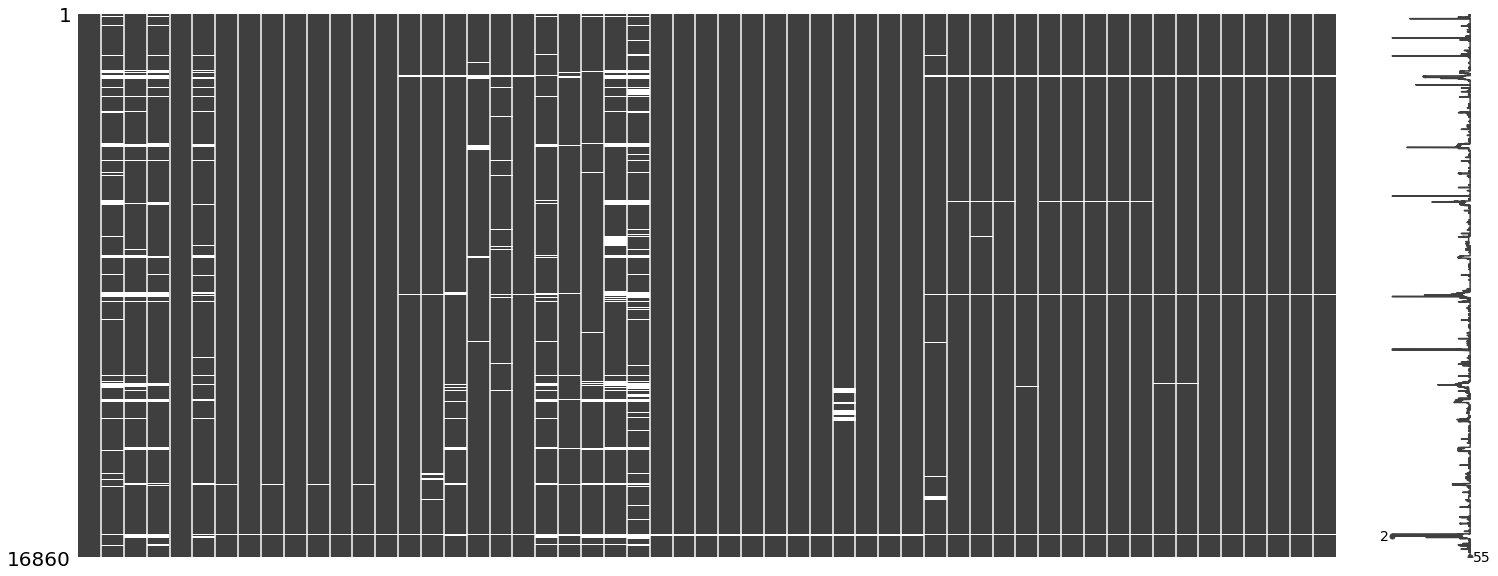

In [16]:
#visualize the missing values for the train set
msno.matrix(gold_train);

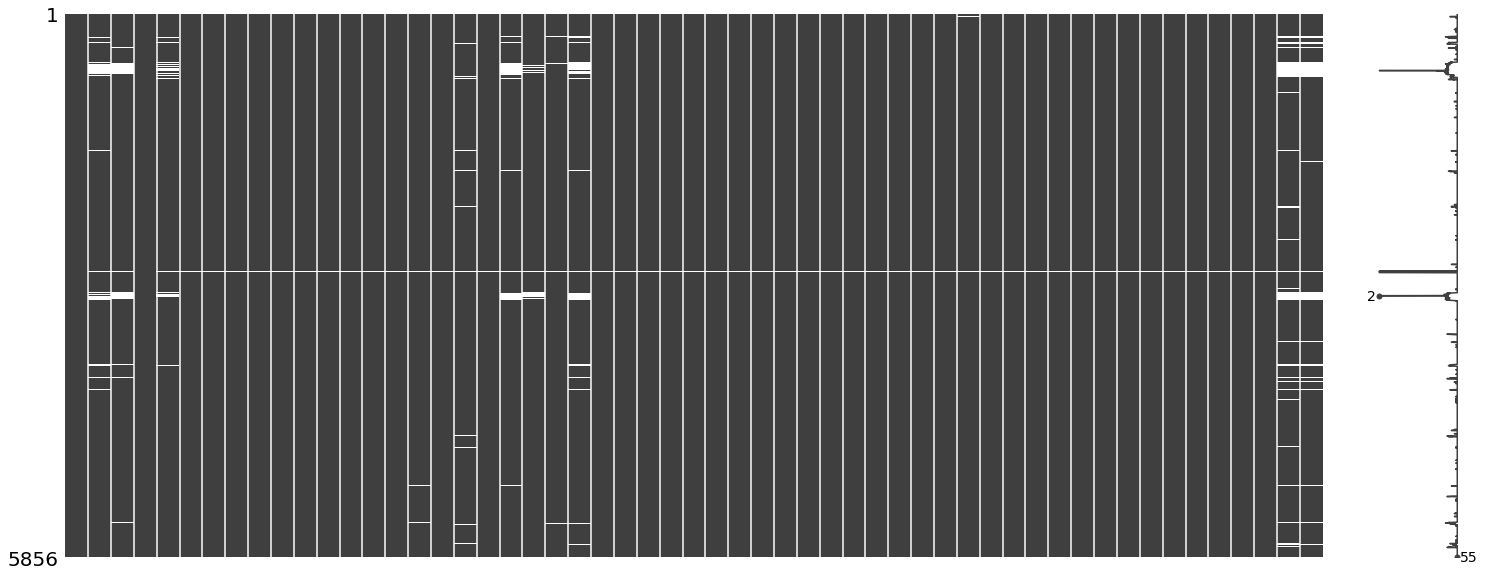

In [17]:
#visualize the missing values for the test set
msno.matrix(gold_test);

As we can see we have a lot of missing values. We could use the `ffil()` method, because we know that parameters that are next to each other in terms of time are often similar, but there are situations where the missing values are consecutive one after other so we'll use an ml algorithm to predict the missing values, we'll use the `KNNImputer()`. As it uses the euclidean distance, it is affected by the scale of the features, so we'll scale our features before using it.

**Scale the data for the imputer:**

There are columns that shouldn't be scaled: the `date` column and our target columns which are `rougher.output.recovery` and `final.output.recovery`.

In [18]:
#define scaler
scaler = StandardScaler()
not_scaled = ['date', 'rougher.output.recovery', 'final.output.recovery']
columns2scale = [x for x in gold_train.columns if x not in not_scaled]
#scale the required columns
train_scaled = pd.DataFrame(scaler.fit_transform(gold_train[columns2scale].copy()), columns = columns2scale)
test_scaled = pd.DataFrame(scaler.transform(gold_test[columns2scale].copy()), columns = columns2scale)

**Fill NaNs and drop the remaining rows with NaNs:**

In [19]:
#define imputer
imputer = KNNImputer(weights='distance')
#fit on the train dataset
train_scaled = imputer.fit_transform(train_scaled)
#transform the test dataset
test_scaled = imputer.transform(test_scaled)

In [20]:
#concat the scaled and not scaled column to one dataframe
gold_train_scaled = pd.concat([gold_train[not_scaled], pd.DataFrame(train_scaled, columns = columns2scale)], axis=1)
gold_test_scaled = pd.concat([gold_test[not_scaled], pd.DataFrame(test_scaled, columns = columns2scale)], axis=1)

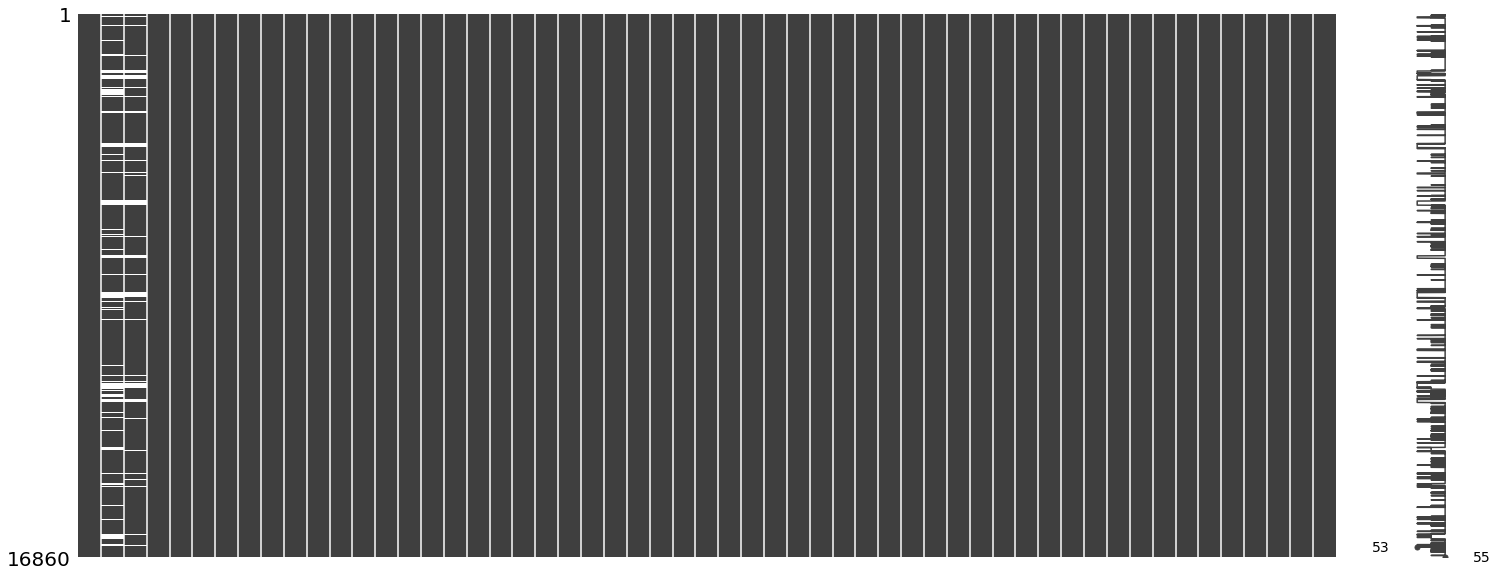

In [21]:
#visualize the missing values for the train_scaeld set
msno.matrix(gold_train_scaled);

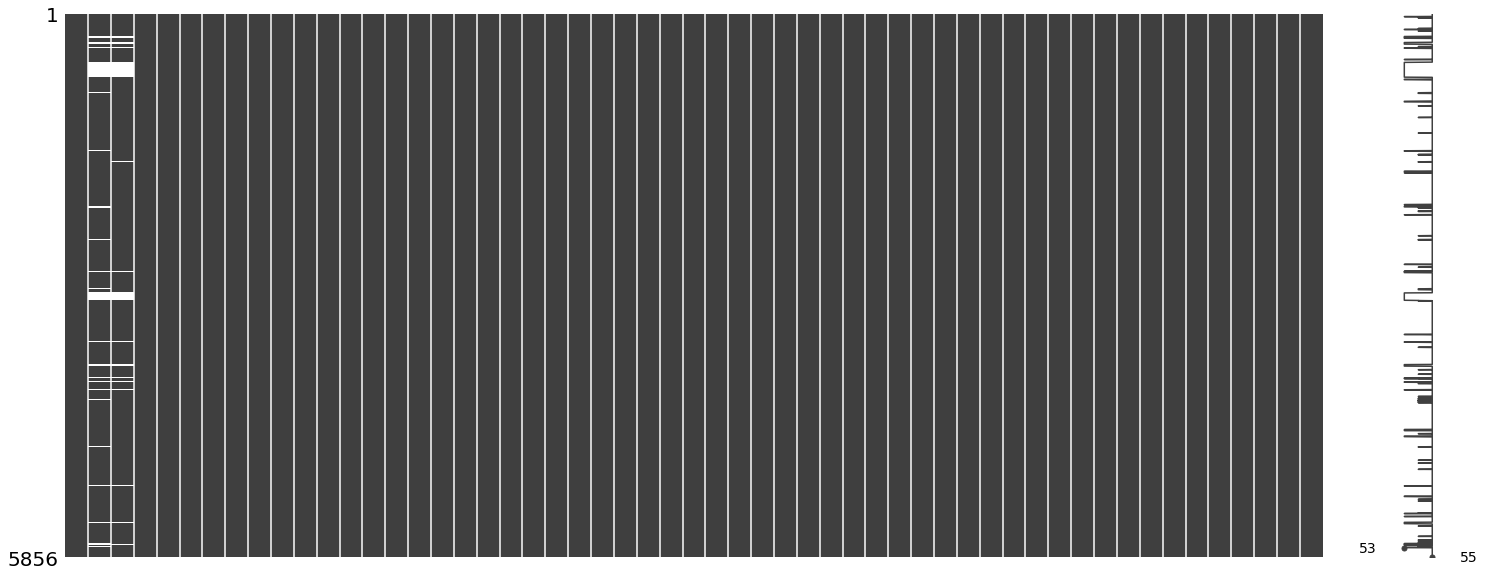

In [22]:
#visualize the missing values for the test_scaled set
msno.matrix(gold_test_scaled);

As we can infer from the graphs and the structure of the data, the missing values are of the target variables. We don't want to try to fill them as it may affect badly the model. So we'll drop those rows with missing target values, even though it is still a pretty high amount.

In [23]:
#drop rows with missing target
gold_train_scaled = gold_train_scaled.dropna().reset_index(drop=True)
gold_test_scaled = gold_test_scaled.dropna().reset_index(drop=True)

**Check for duplicates:**

In [24]:
print(f"Number of duplicated rows in the train set: {gold_train.duplicated().sum()}")
print(f"Number of duplicated rows in the test set: {gold_test.duplicated().sum()}")

Number of duplicated rows in the train set: 0
Number of duplicated rows in the test set: 0


**Conclusions**
***

- All the data types of features and targets are correct. The features are all numeric so no need in encoding. The date column was deleted as it not relevant to the prediction.
- There are no duplicates.
- The missing values of the features were filled with a KNNImputer.
- The rows with missing target values were deleted.

### Exploratory Data Analysis
<a class="anchor" id="chapter1.6"></a>

**Concentrations of metals on different purification stages**

The train and test sets don't contain all the needed concentration (just the initial ones) so we'll need to use the full set for retrieving this information.

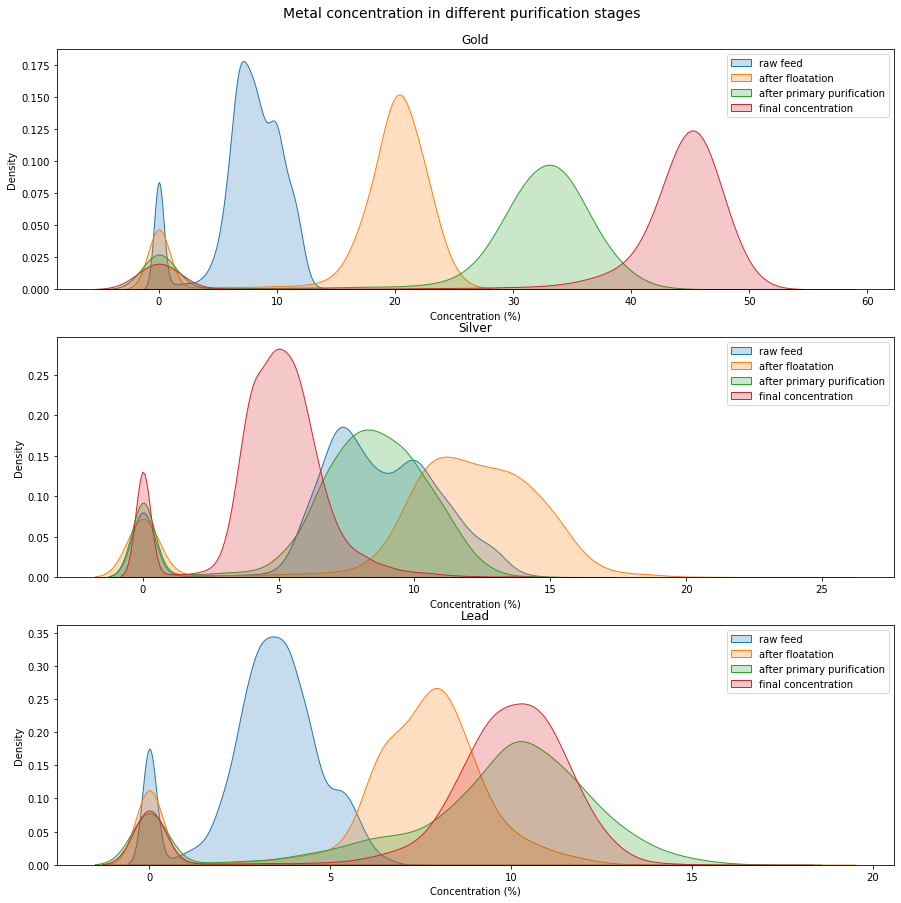

In [25]:
stages = ['rougher.input.feed','rougher.output.concentrate','primary_cleaner.output.concentrate','final.output.concentrate']
metals = {'_au': 'Gold','_ag': 'Silver','_pb':'Lead'}

fig, axes = plt.subplots(nrows=3, ncols =1, figsize =(15,15))
fig.suptitle('Metal concentration in different purification stages', fontsize=14, y=0.92)

i=0
for m in metals.keys():
    for s in stages:
        ax = i
        sns.kdeplot(gold_full[(s+m)], ax = axes[ax], shade='fill', label = (s+m))
        axes[ax].set(title=metals[m], xlabel='Concentration (%)', ylabel='Density')
        axes[ax].legend(['raw feed','after floatation','after primary purification','final concentration'], loc='top_left')
        axes[ax].xaxis.set_label_position('bottom')
    i+=1

plt.show()

For all the metals in all stages, there are significant amount of records with concentration of 0%. It might be that there are cases where the concentration is indeed 0, but also might be a problem with the collected data, therefore it is worth removing these values to ensure accuracy in the model.

The Gold concentration increases in every purification stage which is what we excpect from the process.
The Silver concentration also increases after the floatation stage and then starts do decrease till it gets to a lower level then the initial feed. The Lead concentration increases in every purification stage, but it stays pretty much the same during the first and the second stages of the cleaner process.

**Feed particle size distributions in training and test sets**

As our train and test set are already standardized, the particle size is not actual, but scaled.

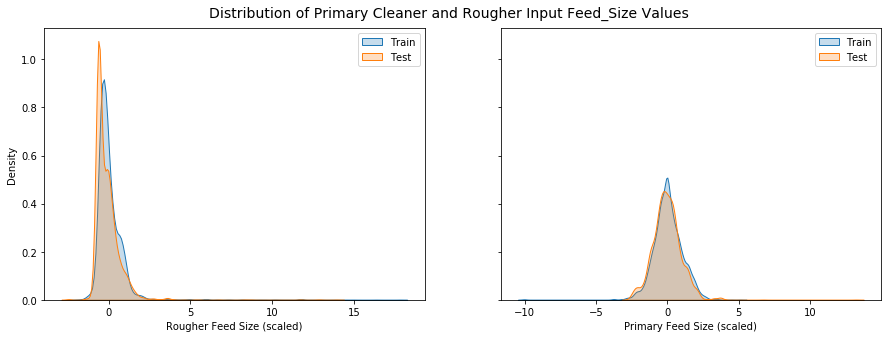

In [26]:
fig, axes = plt.subplots(nrows=1, ncols =2, figsize =(15,5), sharey = True)
fig.suptitle('Distribution of Primary Cleaner and Rougher Input Feed_Size Values', fontsize=14, y=0.94)
sns.kdeplot(gold_train_scaled['rougher.input.feed_size'], ax = axes[0], shade='fill')
sns.kdeplot(gold_test_scaled['rougher.input.feed_size'], ax = axes[0], shade='fill')
sns.kdeplot(gold_train_scaled['primary_cleaner.input.feed_size'], ax = axes[1], shade='fill')
sns.kdeplot(gold_test_scaled['primary_cleaner.input.feed_size'], ax = axes[1], shade='fill')
axes[0].legend(['Train','Test'], loc='top_left')
axes[1].legend(['Train','Test'], loc='top_left')
axes[0].set_xlabel('Rougher Feed Size (scaled)')
axes[1].set_xlabel('Primary Feed Size (scaled)')
plt.show();

The particle size distributions of the particle feed sizes shows that they don't vary siginificantly between the train and the test set, which is good, as differce in the distributions might affect poorly on model's performance.

**Total concentrations of all substances at different stages**

The train and test sets don't contain all the needed concentration (just the initial ones) so we'll need to use the full set for retrieving this information.

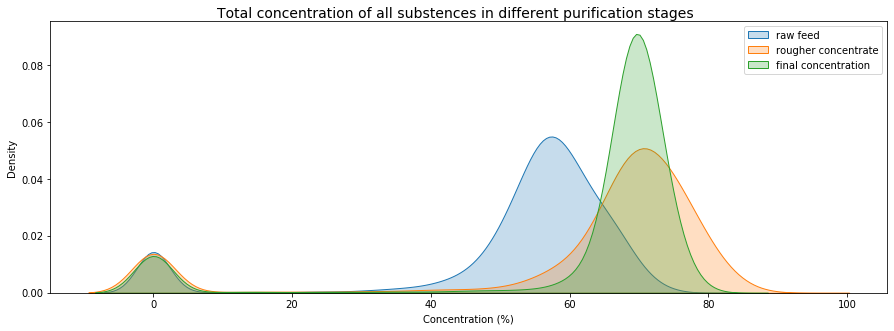

In [27]:
stages = ['rougher.input.feed','rougher.output.concentrate','final.output.concentrate']
materials = ['_au','_ag','_pb','_sol']

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Total concentration of all substences in different purification stages', fontsize=14, y=0.92)

for s in stages:
    total = 0
    for m in materials:
        #sum all metal concentrations in the stage
        total+= gold_full[(s+m)] 
    sns.kdeplot(total, label=s, shade='fill')
    
plt.legend(['raw feed','rougher concentrate','final concentration'], loc='top_left')
plt.xlabel('Concentration (%)')
plt.show()

The concentration distributions at all stages show abnormal values around 0%. As we want to ensure the accuracy of the model, we will remove this outliers from the train and test sets.
Based on all concentration graphs above, we will remove rows that sums up to less than 15% concentration at each stage.
As our train and test sets are already scaled, we will filter these outliers from the full dataframe and then remove these rows from the other datasets based on the `date` column.

### Remove outliers
<a class="anchor" id="chapter1.7"></a>

**Filter out outliers from full dataset**

In [28]:
#filter out the rows that sums up to less than 1% concentration at each stage
gold_full_filtered = gold_full[
    (gold_full[['rougher.input.feed_au','rougher.input.feed_pb','rougher.input.feed_ag', \
                'rougher.input.feed_sol']].sum(axis=1) >= 15) \
    & (gold_full[['rougher.output.concentrate_au','rougher.output.concentrate_pb', \
                  'rougher.output.concentrate_ag','rougher.output.concentrate_sol']].sum(axis=1) >= 15) \
    & (gold_full[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_pb', \
                  'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_sol']].sum(axis=1) >= 15) \
    & (gold_full[['final.output.concentrate_au','final.output.concentrate_pb', \
                  'final.output.concentrate_ag','final.output.concentrate_sol']].sum(axis=1) >= 15)]

We'll plot again the distribution of total concentration of all substences in different purification stages to check the effect of the change.

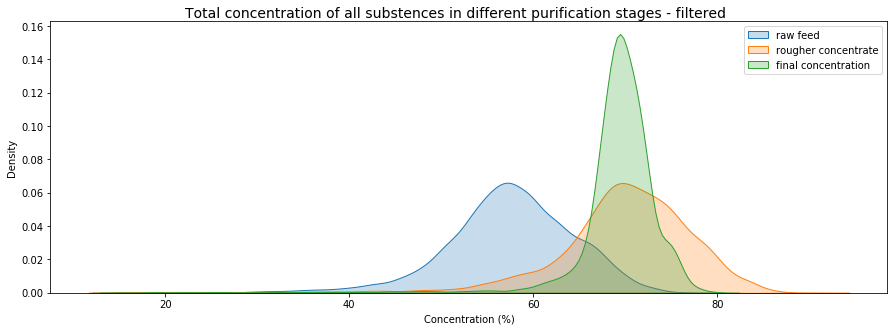

In [29]:
stages = ['rougher.input.feed','rougher.output.concentrate','final.output.concentrate']
materials = ['_au','_ag','_pb','_sol']

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Total concentration of all substences in different purification stages - filtered', fontsize=14, y=0.92)

for s in stages:
    total = 0
    for m in materials:
        #sum all substences concentrations in the stage
        total+= gold_full_filtered[(s+m)] 
    sns.kdeplot(total, label=s, shade='fill')
    
plt.legend(['raw feed','rougher concentrate','final concentration'], loc='top_left')
plt.xlabel('Concentration (%)')
plt.show()

The outliers removed successfully! Now we'll ensure that the train and test sets contain only rows that appeer in the filtered full dataset. We'll do this based on the `date` column.

**Filter out outliers from train and test sets**

In [30]:
#a list of the dates that can be included
legit_dates = gold_full_filtered['date']

In [31]:
#filter out the outliers from the train and test set
gold_train_scaled = gold_train_scaled.query('date in @legit_dates').reset_index(drop=True)
gold_test_scaled = gold_test_scaled.query('date in @legit_dates').reset_index(drop=True)

Now when the data is clean, we are ready for developing a model.

## Building a model
***
<a class="anchor" id="chapter2"></a>

### Functions for calculating sMAPE & Final sMAPE
<a class="anchor" id="chapter2.1"></a>

These are the formulas of our error evaluation metrics:

$$\text{sMAPE}  = \frac{1}{N}\sum_{i=1}^{N}\frac{|y_i- \hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2}*100\%$$

$$\text{Final sMAPE} = 25\%*\text{sMAPE}(rougher)+75\%*\text{sMAPE}(final)$$

Now we'll define the functions that will calculate them.

In [32]:
#function for calculating the smape metric
def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    smape = np.mean(error / ((abs(y_true) + abs(y_pred)) / 2))
    return smape

#function for calculating the final smape
def final_smape(y_true, y_pred):
    y_true = y_true.to_numpy()
    rougher = smape(y_true[:, 0], y_pred[:,0])
    final = smape(y_true[:,1], y_pred[:,1])
    final_smape = 0.25 * rougher + 0.75 * final
    return final_smape

**Spliting the sets to features and targets**

As we mentioned before, the `date` column is not relevant for our prediction, thus we'll remove it.

In [33]:
#drop the date column
gold_train_scaled = gold_train_scaled.drop(['date'], axis=1)
gold_test_scaled = gold_test_scaled.drop(['date'], axis=1)

Now we'll split the sets to features and targets.

In [34]:
#split train and test sets to features and targets
targets_train = gold_train_scaled[['rougher.output.recovery', 'final.output.recovery']]
features_train = gold_train_scaled.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

targets_test = gold_test_scaled[['rougher.output.recovery', 'final.output.recovery']]
features_test = gold_test_scaled.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

print('Sizes of the train set:\n'+len('Sizes of the train set:')*'-')
print(f'Features train: {features_train.shape}')
print(f'Targets train: {targets_train.shape}\n')
print('Sizes of the test set:\n'+len('Sizes of the test set:')*'-')
print(f'Features test: {features_test.shape}')
print(f'Targets test: {targets_test.shape}')

Sizes of the train set:
-----------------------
Features train: (13518, 52)
Targets train: (13518, 2)

Sizes of the test set:
----------------------
Features test: (5101, 52)
Targets test: (5101, 2)


As the data is clean and organized we are ready to compare between different regression models.

### Training and evaluating models
<a class="anchor" id="chapter2.2"></a>

In [35]:
#constant random state for repeating the same results
state = 1234

#create scorer for GridSearchCV
smape_score = make_scorer(final_smape, greater_is_better=False)

**Decision Tree Regressor**

In [36]:
%%time
model = GridSearchCV(DecisionTreeRegressor(random_state=state),
                     param_grid={'max_depth': range(5, 10, 1), 
                                 'min_samples_split' : range(2, 10, 2)},
                     cv=5, scoring = smape_score)
model.fit(features_train, targets_train)
print('Decision Tree Regressor:\n'+len('Decision Tree Regressor:')*'-')
print(f'Best Final sMAPE: {abs(model.best_score_):.2%}')
print(f'Best Params: {model.best_params_}\n')

Decision Tree Regressor:
------------------------
Best Final sMAPE: 9.78%
Best Params: {'max_depth': 5, 'min_samples_split': 2}

CPU times: user 53.1 s, sys: 0 ns, total: 53.1 s
Wall time: 54.4 s


**Random Forest Regressor**

In [37]:
%%time
model = GridSearchCV(RandomForestRegressor(random_state=state),
                     param_grid={'max_depth' : range(4, 10, 2), 'n_estimators' : range(40, 50, 5)},
                     cv=5, scoring=smape_score)
model.fit(features_train, targets_train)
print('Random Forest Regressor:\n'+len('Random Forest Regressor:')*'-')
print(f'Best Final sMAPE: {abs(model.best_score_):.2%}')
print(f'Best Params: {model.best_params_}\n')

Random Forest Regressor:
------------------------
Best Final sMAPE: 8.56%
Best Params: {'max_depth': 4, 'n_estimators': 45}

CPU times: user 6min 43s, sys: 220 ms, total: 6min 43s
Wall time: 6min 49s


**Linear Regressor**

In [38]:
%%time
model = GridSearchCV(LinearRegression(), param_grid={}, cv=5, scoring=smape_score)
model.fit(features_train, targets_train)
print('Linear Regressor:\n'+len('Linear Regressor:')*'-')
print(f'Best Final sMAPE: {abs(model.best_score_):.2%}\n')

Linear Regressor:
-----------------
Best Final sMAPE: 10.07%

CPU times: user 1.26 s, sys: 876 ms, total: 2.13 s
Wall time: 2.12 s


**Elastic Net Regressor**

In [39]:
%%time
model = GridSearchCV(ElasticNet(random_state=state), 
                     param_grid={'alpha' : np.arange(.5, 1, .1), 'l1_ratio' : np.arange(0.4, 1, .2)}, 
                     cv=5, scoring=smape_score)
model.fit(features_train, targets_train)
print('Elastic Net Regressor:\n'+len('Elastic Net Regressor:')*'-')
print(f'Best Final sMAPE: {abs(model.best_score_):.2%}')
print(f'Best Params: {model.best_params_}\n')

Elastic Net Regressor:
----------------------
Best Final sMAPE: 8.38%
Best Params: {'alpha': 0.5, 'l1_ratio': 0.6000000000000001}

CPU times: user 26.6 s, sys: 23.8 s, total: 50.5 s
Wall time: 50.9 s


**Lasso Regressor**

In [40]:
%%time
model = GridSearchCV(Lasso(random_state=state), 
                     param_grid={'alpha' : np.arange(.01, 1, .05)}, 
                     cv=5, scoring=smape_score)
model.fit(features_train, targets_train)
print('Lasso Regressor:\n'+len('Lasso Regressor:')*'-')
print(f'Best Final sMAPE: {abs(model.best_score_):.2%}')
print(f'Best Params: {model.best_params_}\n')

Lasso Regressor:
----------------
Best Final sMAPE: 8.47%
Best Params: {'alpha': 0.31000000000000005}

CPU times: user 1min 13s, sys: 1min 5s, total: 2min 19s
Wall time: 2min 19s


We trained 5 different regression models and found their average sMAPE scores and hyperparameters using cross validation (with GreadSearchCV). As we can see, **the Elastic Net Regressor yields the best results, with an average sMAPE of 8.38%.**

### Testing the Best Model
<a class="anchor" id="chapter2.3"></a>

In [41]:
#the best model with the best parameters found
best_model = ElasticNet(random_state=state, alpha=0.5, l1_ratio=0.6000000000000001)
best_model.fit(features_train, targets_train)
targets_pred = best_model.predict(features_test)

best_smape = final_smape(targets_test, targets_pred)

print(f'Best Final sMAPE score for best Elastic Net Regressor (test set): {best_smape:.2%}')

Best Final sMAPE score for best Elastic Net Regressor (test set): 6.28%


Interestingly, for our best model with the best hyperparameters, we got a better sMAPE score for the test set than the training set. Now we'll build a dummy model for a sanity check for our best model. We want to see that the sMAPE score of our model is lower than the dummy model.

**Sanity Check**

In [42]:
#dummy model
dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train, targets_train)

#calculate sMAPE score for the dummy model
smape_dummy = final_smape(targets_test, dummy.predict(features_test))
print(f'Final sMAPE score for dummy model: {smape_dummy:.2%}')

Final sMAPE score for dummy model: 7.67%


As we see, our best model obtained a sMAPE score of 6.28% and the dummy model (the average values of the targets) obtained a sMAPE score of 7.67% which means that our model is better!

## General conclusions
***
<a class="anchor" id="chapter3"></a>

In this project we tried to build a ML model that predicts the amount of gold recovered from gold ore, based on collected data about extraction and purification processes.

We had to preprocess the data as we had some missing values and missing columns in the different datasets. We predicted the missing values with a KNN imputer and added the missing columns from the full dataset. 
Later on we analyzed the concentration of the metals at different stages and the total concentration of all substences at different stages. Based on the resulting graphs we decided on a method to remove the outliers.
We chose the sMAPE error score as our evaluating metric and defined a function for calculating the final sMAPE score.
We trained 5 different regression models and calculated their average final sMAPE score using cross validation. The best model with the lowest sMAPE score was a Elastic Net regressor (with alpha=0.5, l1_ratio=0.6000000000000001) and we needed to compare it with a dummy model.
We found out our best model obtained a sMAPE score of 6.28% and the dummy model (the average values of the targets) obtained a sMAPE score of 7.67% which means that our model is better.

As the results of the dummy model and the best model on the test set are lower than the lowest score of our best model on the train set, we recommend selecting randomized samples for the train and test sets as well as retraining our best model checking for consistency.